<a href="https://colab.research.google.com/github/Prebor97/prebor_haggai/blob/main/Haggai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import io
df = pd.read_csv(io.BytesIO(uploaded['traffic.csv']))

##### For the main modelling just skip to line 32. But what I am going to do is to walk you through my line of thinking for the codes from line 4 all the way to line 31

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
df['Junction'].value_counts()

1    14592
2    14592
3    14592
4     4344
Name: Junction, dtype: int64

#### In line 5 above, what I tried to acheive was to see if the values in junction were one throughout or if they were not, what is the distribution about the data

In [ ]:
df_1 = df[df.Junction == 1]
df_2 = df[df.Junction == 2]
df_3 = df[df.Junction == 3]
df_4 = df[df.Junction == 4]

#### In line 6, I partitioned the data into 4. That is I divided the data according to the number of junctions. I did this so I could investigate the effect the number of junctions had on the traffic(number of vehicles)

In [ ]:
df_1.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
df_2.head()

,DateTime,Junction,Vehicles,ID
14592,2015-11-01 00:00:00,2,6,20151101002
14593,2015-11-01 01:00:00,2,6,20151101012
14594,2015-11-01 02:00:00,2,5,20151101022
14595,2015-11-01 03:00:00,2,6,20151101032
14596,2015-11-01 04:00:00,2,7,20151101042


In [ ]:
df_3.head()

,DateTime,Junction,Vehicles,ID
29184,2015-11-01 00:00:00,3,9,20151101003
29185,2015-11-01 01:00:00,3,7,20151101013
29186,2015-11-01 02:00:00,3,5,20151101023
29187,2015-11-01 03:00:00,3,1,20151101033
29188,2015-11-01 04:00:00,3,2,20151101043


In [ ]:
df_4.head()

,DateTime,Junction,Vehicles,ID
43776,2017-01-01 00:00:00,4,3,20170101004
43777,2017-01-01 01:00:00,4,1,20170101014
43778,2017-01-01 02:00:00,4,4,20170101024
43779,2017-01-01 03:00:00,4,4,20170101034
43780,2017-01-01 04:00:00,4,2,20170101044


In [ ]:
print('The mean of the values for only one junction is ', df_1['Vehicles'].mean())
print('The mean of the values for only two junction is ', df_2['Vehicles'].mean())
print('The mean of the values for only three junction is ', df_3['Vehicles'].mean())
print('The mean of the values for only four junction is ', df_4['Vehicles'].mean())

The mean of the values for only one junction is  45.05290570175438
The mean of the values for only two junction is  14.253220942982455
The mean of the values for only three junction is  13.694010416666666
The mean of the values for only four junction is  7.251611418047882


##### Basically, what i have tried to do hear is to determine if the number of junctions determine the number of cars congested in a particular area. It actually determines it. Given the mean of each of the Junctions, it is clear that the highest number of junctions (4) yielded the least traffic. So I am going to add number of junctions as a regressor 

In [ ]:
corr_data = df.drop(columns = 'DateTime')
corr_data.corr()

,Junction,Vehicles,ID
Junction,1.000000,-0.613787,0.221876
Vehicles,-0.613787,1.000000,0.227974
ID,0.221876,0.227974,1.000000


#### The Junction and Vehicles gave a correlation of -0.6137. I think that is high enough. Now I am dropping the ID because it is basically useless afterwhich I will change the time column to a datetime data type 

In [ ]:
df.drop(columns = 'ID', inplace = True)

In [ ]:
df['DateTime']= pd.to_datetime(df['DateTime'])

In [ ]:
df.set_index('DateTime', inplace = True)

#### Time to visualize my data

In [ ]:
import matplotlib.pyplot as plt

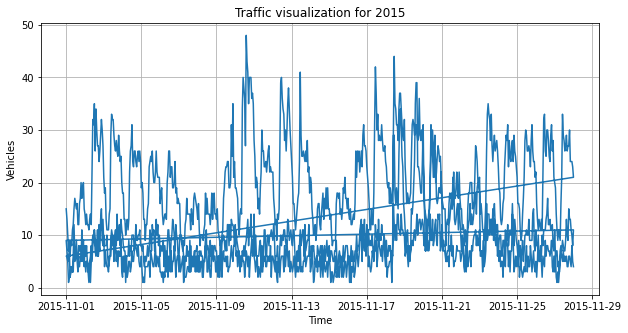

In [ ]:
four_weeks = df.Vehicles.loc[df.Vehicles.index<='2015-11-28 00:00:00']
plt.figure(figsize=(10,5))
plt.plot(four_weeks)
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.title('Traffic visualization for 2015')
plt.grid()
plt.show()

#### For the above plot, I tried plotting it all through the years. What this did was bring out a really stacked and congested plot because the data points were too much. I then decided to take only the first 4 weeks. Honestly I am supposed to get a smooth and single varying line curve but what I am getting is like 2 plots stacked on each other (one on top and at the bottom).

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import statsmodels.api as sm

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df['Vehicles'], model = 'additive',extrapolate_trend='freq', period = 1)
decompose_series.plot()
plt.show()

#### What I tried acheiving was to get a sort of like summary analysis of the time serie. Basically in time series analysis, what we try to look for is trend and seasonality.
#### Trend is a pattern in data that shows the movement of a series to relatively higher or lower values over a long period of time. In other words, we want to see if traffic is increasing as the years go by or if it is decreasing or if it increases at a point, then decreases, then increases and stuffs like that. From this we can determine if there is an improvement in the traffic situation or a reverse ( a worsenng of the situation) or if there was no change at all. Normally, trend is meant to be like a single line showing increment or decrement but I dont understand why it is giving what I am seeing above. That is why I said the statistics of this data is just confusing. I was planning on using arima and sarima models on this data. But if I cannot determine the trend clearly its next to impossible for me to get any meaningful result from the models. This is the reason why I am trying out other models.
#### Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year. Meaning maybe at 12 o clock everyday probably the number of vehicles is the same everyday or maybe if every month the number of vehicles is the same or if it decreases by the same amount or percentage every month, day, year and so on. As you can see from the above, there is no seasonality (no upward or downward motion of the curve indicating regular patterns at certain time intervals). I just tire. 

In [ ]:
df_daily = df.resample('D').mean() 

#### What I did in the code above was to downsample the time series from hourly to daily. Downsampling or Upsampling is when we try to reduce the time intervals in a time series. For example the data shows time interval of one hour for about 5 years. Thats too much data now. You may now want to increase the interval to say maybe daily. What will happen is that you will now get the aggregate (mean) of the hourly data for 24 hours and take it for one day. If it were monthly resampling you would get the daily data for 30, 31 or 28 days,  get the mean and take it as 1 month. I did this resampling cause I felt that since se want to see what the traffic will be like every day, why not run prediction on a daily basis. The problem with this is that it also resamples the junction column and turns it to a float. It is meant to be an integer and I feel the model will not perform well because of this.  

In [ ]:
df_daily.head()

,Junction,Vehicles
DateTime,,
2015-11-01,2.0,8.277778
2015-11-02,2.0,12.625000
2015-11-03,2.0,12.652778
2015-11-04,2.0,11.361111
2015-11-05,2.0,10.694444


In [ ]:
df_1month = df.iloc[:695]

#### In the above line of code, I manually searched for the len of the data that gave me exactly one month cause I later decided to run the prediction based on one month rather than years or daily 

Text(0, 0.5, 'Vehicles')

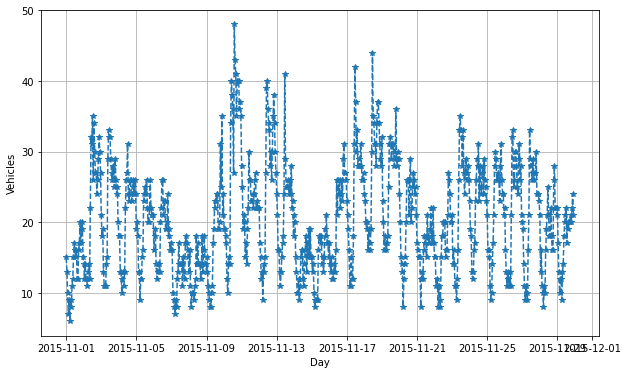

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_1month.index, df_1month.Vehicles, '--', marker = '*')
plt.grid()
plt.xlabel('Day')
plt.ylabel('Vehicles')

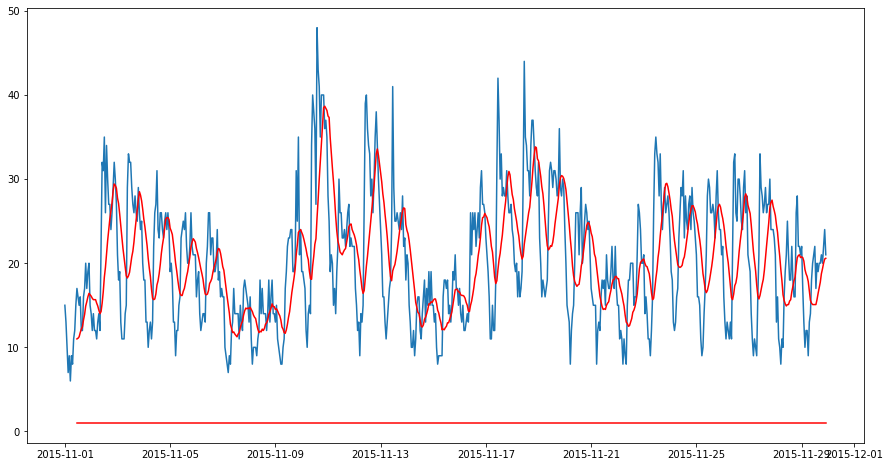

In [ ]:
plt.plot(df_1month.index, df_1month.Vehicles, '-')
plt.plot(df_1month.rolling(12).mean(), color='red')

#### The above graph looked reasonable after treating it as a monthly data. The moving average (red line curve) is the trend we are looking for.

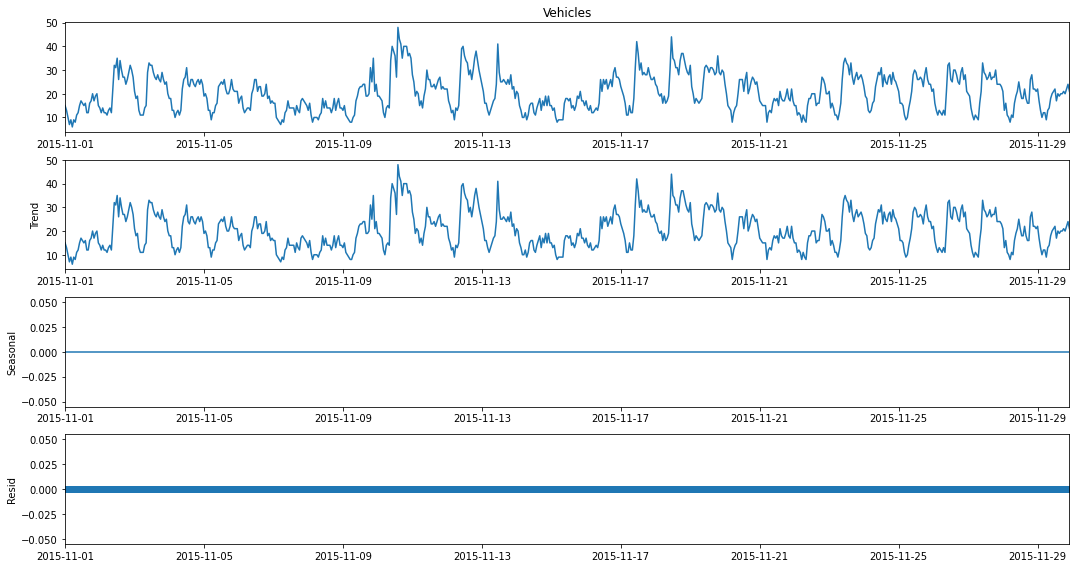

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df_1month['Vehicles'], model = 'additive',extrapolate_trend='freq', period = 1)
decompose_series.plot()
plt.show()

#### From the above we can see that the trend mimicks the original data. This means that there was no recognizable upward or downward movement of the data. As a consequence, we see a seasonality with a straight horizontal line, meaning their are no recognizable patterns in the data (i.e traffic is random and does not increase at certain points or decrease at certain points). But I feel if it were to be Lagos there would be seasonality because in the morning around 4 or 5 am traffic will be low and in the afternoon it will be very high. I beleive to understand seasonality and trend you should go through the notebook(prebortimeseries) included in this repository, you will understand it better with that not with this nonsense data (laughing imoji).

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_1month['Vehicles'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

ADF Statistic: -2.7154729352080067
p-value: 0.07139883320167077
No. of lags used: 20
No. of observations used : 674
Critical Values:
   1%: -3.4400894360545475
   5%: -2.865837730028723
   10%: -2.5690586760471605


#### The above line of code is what we call the adfuller test. It is just basically to prove mathematically if there is a trend or not. The above lines of codes are the same everywhere on the internet. Its not something you even need to understand sef. You can just copy and paste it from the net, just make sure you input the correct variables. 
#### So basically how it works is that if the p value is greater than the 5% critical value and the ADF Statistics is greater than all the critical levels, it has a trend. But if the above conditions are not meant it means there is no trend. So mathematically we can say there is a trend since it fufils all conditions (except the ADF Statisics is less than the critical value at 10%). The issue I am having is I do not understand this trend that is why i choose not to use arima and sarima models.

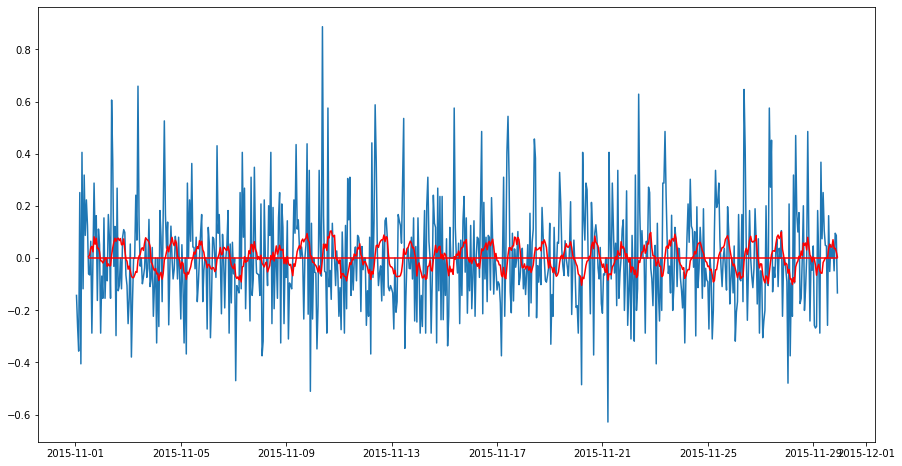

In [ ]:
df_log = np.log(df_1month) #Transformation
df_diff = df_log.diff(periods=1) # Differencing
plt.plot(df_diff.index, df_diff.Vehicles, '-')
plt.plot(df_diff.rolling(12).mean(), color='red')

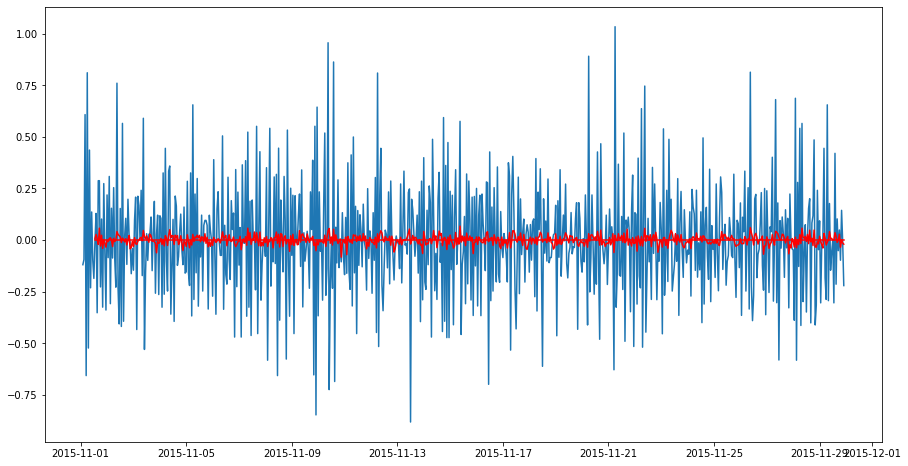

In [ ]:
df_diff1 = df_diff.diff(periods=1) # Differencing
plt.plot(df_diff1.index, df_diff1.Vehicles, '-')
plt.plot(df_diff1.rolling(12).mean(), color='red')

#### What we do after discovering there is a trend is what they call differencing (a technique used in removing trends from data). Mind you, the reason why we are removing trend is because for arima and sarima to be effective, it needs to be done on a data with no trend. Once again I am meant to get my rolling mean (trend which is the red line curve as a single line but I do not just understand). You can check how it is meant to be from the notebook in the repository I will send to you.   

# Time for the prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from xgboost import XGBRegressor

In [ ]:
# Seperating the features from the target
features_data = df.drop('Vehicles', axis=1)
target = df['Vehicles']

# Splitting the data into train and test, 80% for train and 20% for test. What the shuffle =  false does is that it eliminates random shuffling of the data
# in order to maintain the timeseries ordered relationship
X_train, X_test, y_train, y_test = train_test_split(features_data, target, test_size=0.2, shuffle=False)

In [ ]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x: x_train
    y: y_train
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    mape = mean_absolute_percentage_error(y, predicted)
    
    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}%'.format(mape*100))
    print()

In [ ]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {'Linear Reg': LinearRegression(), 'DT Regressor': DecisionTreeRegressor(random_state=0, max_depth = 2),
          'RF Regressor':RandomForestRegressor(random_state=0, max_depth = 2), 'Lasso': LassoCV(random_state=0), 'Ridge Regressor': RidgeCV(),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0), 'SGDRegressor': SGDRegressor(random_state=0)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(X_train, y_train)
    print(f'Performance of "{key}" on Train and Test set:')
    print('=='*28)
    print ( 'Train set:')
    print("**"*8)
    evaluate_model(model,X_train, y_train)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,X_test, y_test)

Performance of "Linear Reg" on Train and Test set:
Train set:
****************
MAE: 12.59
MAPE: 75.62%

Test set:
****************
MAE: 15.64
MAPE: 183.82%

Performance of "DT Regressor" on Train and Test set:
Train set:
****************
MAE: 10.71
MAPE: 63.81%

Test set:
****************
MAE: 6.50
MAPE: 77.38%

Performance of "RF Regressor" on Train and Test set:
Train set:
****************
MAE: 10.71
MAPE: 63.81%

Test set:
****************
MAE: 6.50
MAPE: 77.39%

Performance of "Lasso" on Train and Test set:
Train set:
****************
MAE: 12.53
MAPE: 80.61%

Test set:
****************
MAE: 9.74
MAPE: 101.68%

Performance of "Ridge Regressor" on Train and Test set:
Train set:
****************
MAE: 12.59
MAPE: 75.62%

Test set:
****************
MAE: 15.64
MAPE: 183.80%

[17:57:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Performance of "xgboost" on Train and Test set:
Train set:
****************
MAE: 10.71
MA

#### The model with the least mean absolute percentage error (MAPE) is the xgboost. But this my models performed poorly sha I do not know why. Perhaps neural prophet would yield a better result. I need to learn that shit. I am not happy it performed poorly although it was expected because of the lack of seasonality. It is just like given the algorithm little to nothing to work with. Sorry I did not leave any out of sample data. I was done with the modelling before i figured that out and I not fit stress myself go dey fit am in abeg.

# Now let me try facebook prophet and neural prophet

In [ ]:
def Evaluation_metrics(predicted, actual):
  MAE = np.mean(abs(predicted - actual))
  MSE = np.square(np.subtract(predicted, actual)).mean()
  RMSE = np.sqrt(np.mean(np.square(predicted - actual)))
  MAPE = np.mean((np.abs(np.subtract(actual, predicted)/actual)))*100
  print('The Mean Absolute Error is ', round(MAE,2))
  print('The Mean Squared Error is ', round(MSE,2))
  print('The Root Mean Squared Error is ', round(RMSE,2))
  print('The Mean Absolute Percentage Error is ', round(MAPE,2))

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 1.9 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6637561 sha256=de9de458e02025fe90846e0131a96c388042fed11b7d80d03bde3efd5bd7b29d
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
from fbprophet import Prophet

In [ ]:
df_copy = df.copy()

In [ ]:
Main_df = df_copy.rename(columns = { 'DateTime':'ds','Vehicles': 'y'})

In [ ]:
junc = Main_df['Junction']

In [ ]:
Main_df['Junction'] = junc

In [ ]:
Main_df.head()

,y,Junction
DateTime,,
2015-11-01 00:00:00,15,1
2015-11-01 01:00:00,13,1
2015-11-01 02:00:00,10,1
2015-11-01 03:00:00,7,1
2015-11-01 04:00:00,9,1


In [ ]:
Main_df = Main_df.reset_index()[['DateTime', 'y']].rename(columns={'DateTime': 'ds'})

In [ ]:
Main_df.head()


,ds,y
0,2015-11-01 00:00:00,15
1,2015-11-01 01:00:00,13
2,2015-11-01 02:00:00,10
3,2015-11-01 03:00:00,7
4,2015-11-01 04:00:00,9


#### Refer to NeuralProphet in the repository to see the implementation of facebook prophet and neural prophet and refer to PreborTimseseries in same repo to see implementation os arima 